In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# read the Houses dataset CSV file
housing_data = pd.read_csv("./RealEstate.csv", sep=",")
housing_data.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [3]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
print("Size shape:", Xs.shape)
print("Price shape:", Ys.shape)
dataset_size = Xs.shape[0]
print("Size:", dataset_size)

Size shape: (781, 1)
Price shape: (781, 1)
Size: 781


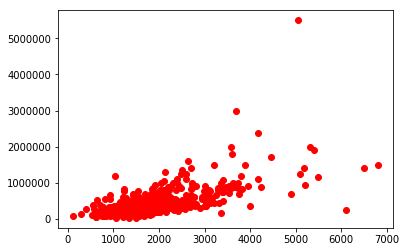

In [4]:
# plot the price and the size
plt.plot(Xs, Ys, 'ro')

In [5]:
Xs = Xs.values.squeeze()
Ys = Ys.values.squeeze()

In [6]:
# Normalize the input features
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)

In [7]:
Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

# shuffle the dataset before separating test/train sets
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]

In [8]:
# separate train/test sets 
# Use 80% for training and 20% for testing
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]

Text(0,0.5,'Price')

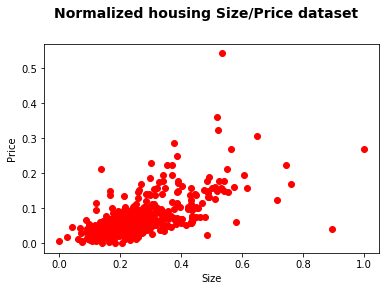

In [9]:
# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

In [10]:
min_x = np.min(Xs_train)
max_x = np.max(Xs_train)

In [11]:
# Define the Linear model
# Initialize the weights using a normal (Gaussian) distribution with 0 mean and unit variance
W0 = np.random.normal(loc=0, scale=0.02) # Y intercept
W1 = np.asarray(np.random.normal(loc=0, scale=0.02)) # Slop of the line
W1 = W1.reshape((1))

In [12]:
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        x_batch = Xs[i:i+batch_size]
        if x_batch.shape[0] < batch_size:
            continue
        yield np.reshape(x_batch, (batch_size,-1)), Ys[i:i+batch_size]

In [13]:
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)
    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y, max_y], 'k-', lw=2)
    #plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    #plt.clf()
    plt.show()

In [14]:
# defines the size of the step we want to perform in the direction of the gradient
lr = 0.1

# set the pocket weights
W0_hat = np.inf
W1_hat = np.inf
best_hypothesis = np.inf

validation_err_list = []
training_err_list = []
batch_size = 96
total_epochs = 150

In [15]:
def mean_squared_error(Ys_batch, Y_pred):
    return np.mean((Ys_batch-Y_pred)**2)

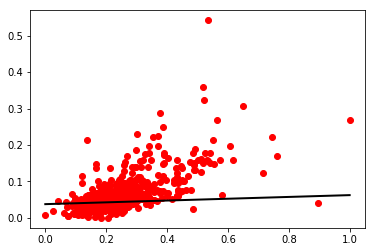

Epoch: 0 Generalization err: 0.00979564065764132


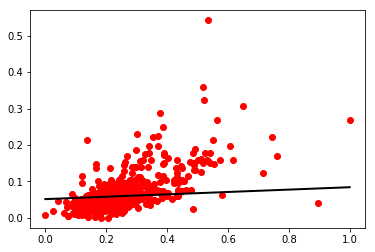

Epoch: 1 Generalization err: 0.009004647830247067


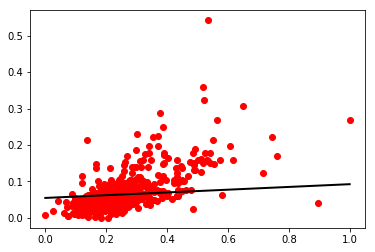

Epoch: 2 Generalization err: 0.008819591463712667


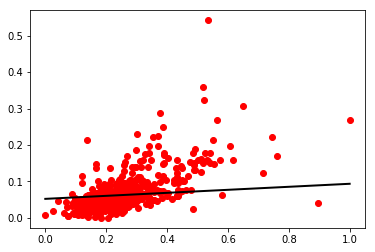

Epoch: 3 Generalization err: 0.00878453626277819


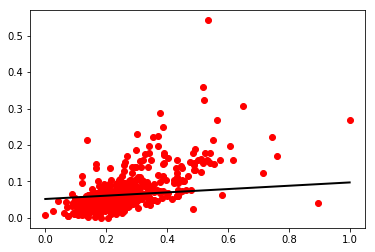

Epoch: 4 Generalization err: 0.008701487765970161


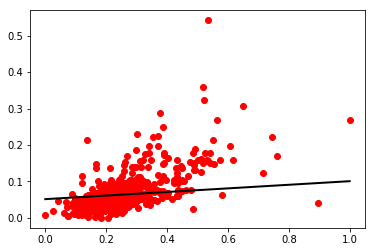

Epoch: 5 Generalization err: 0.008624980360184996


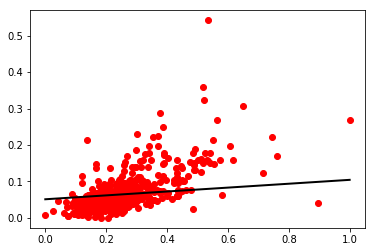

Epoch: 6 Generalization err: 0.00854470260864468


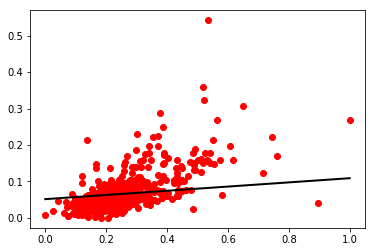

Epoch: 7 Generalization err: 0.008453585599382175


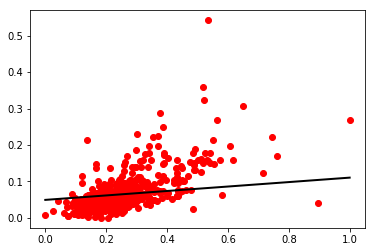

Epoch: 8 Generalization err: 0.008409521731690022


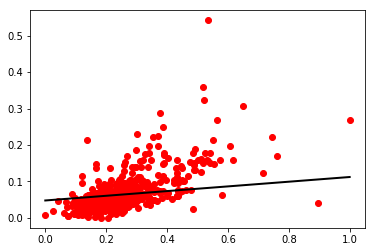

Epoch: 9 Generalization err: 0.008366996751840345


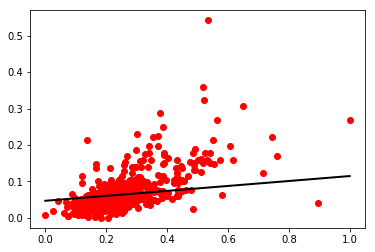

Epoch: 10 Generalization err: 0.00830940035313966


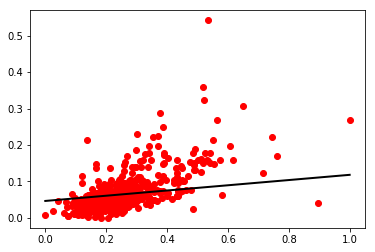

Epoch: 11 Generalization err: 0.008238110068758252


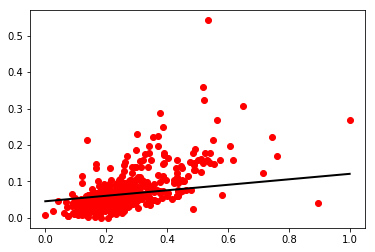

Epoch: 12 Generalization err: 0.008179431420406615


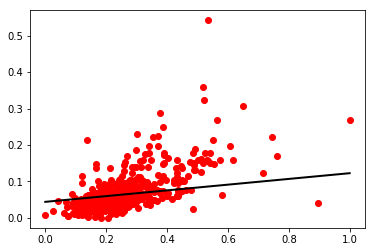

Epoch: 13 Generalization err: 0.008137864368664599


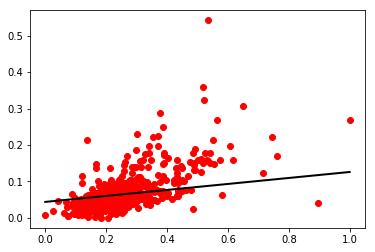

Epoch: 14 Generalization err: 0.008070139137378295


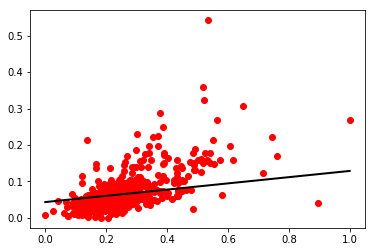

Epoch: 15 Generalization err: 0.008011414635871485


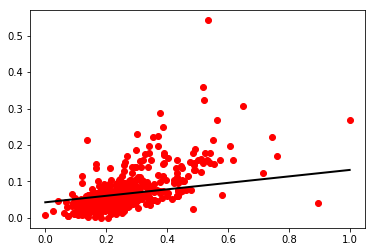

Epoch: 16 Generalization err: 0.00795514078256334


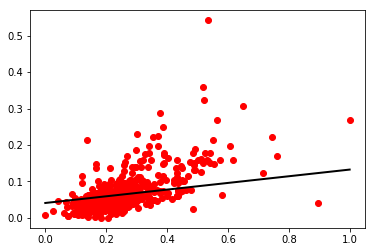

Epoch: 17 Generalization err: 0.007929261840747699


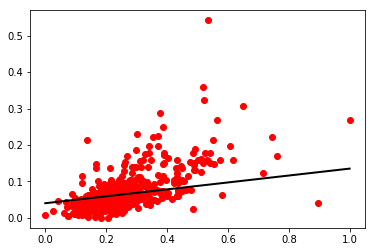

Epoch: 18 Generalization err: 0.007875320645772493


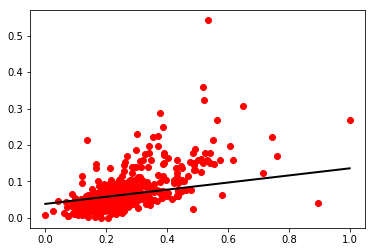

Epoch: 19 Generalization err: 0.007857556609986239


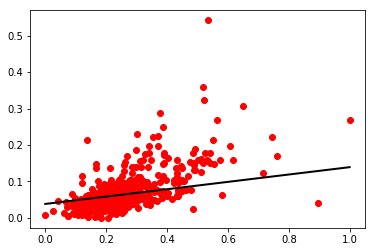

Epoch: 20 Generalization err: 0.0077931216956996915


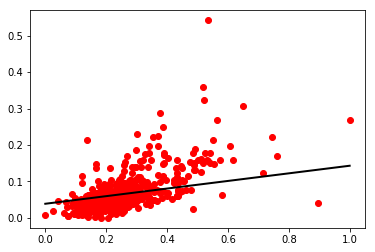

Epoch: 21 Generalization err: 0.007718585689940869


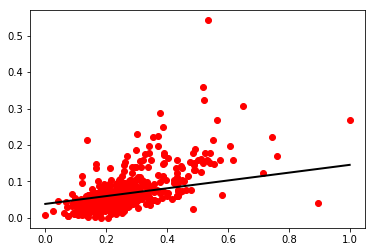

Epoch: 22 Generalization err: 0.007671935871578845


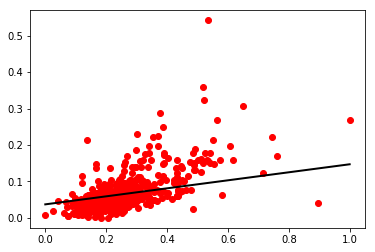

Epoch: 23 Generalization err: 0.0076377967806840145


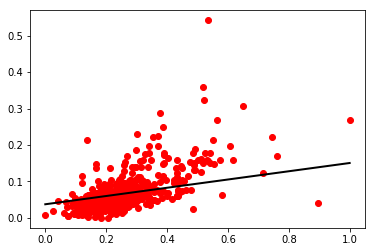

Epoch: 24 Generalization err: 0.007574315178540654


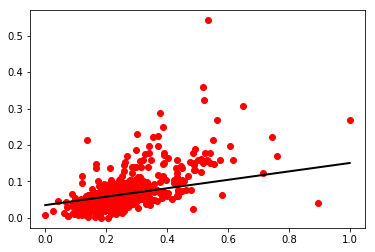

Epoch: 25 Generalization err: 0.00756751020713388


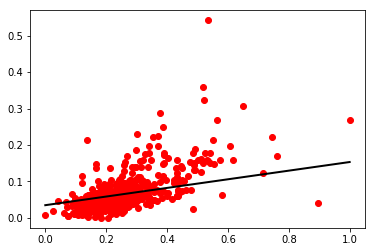

Epoch: 26 Generalization err: 0.0075170076335812136


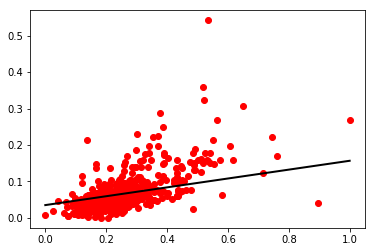

Epoch: 27 Generalization err: 0.007454797185924958


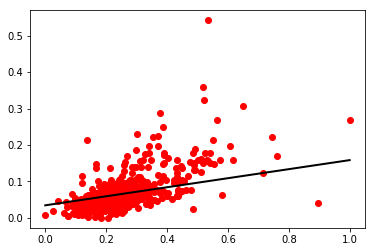

Epoch: 28 Generalization err: 0.007420633440484689


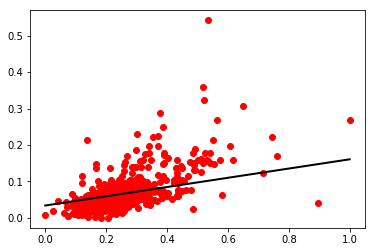

Epoch: 29 Generalization err: 0.007379506773077563


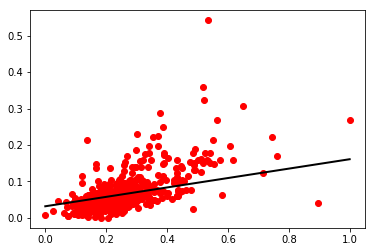

Epoch: 30 Generalization err: 0.007370185727919248


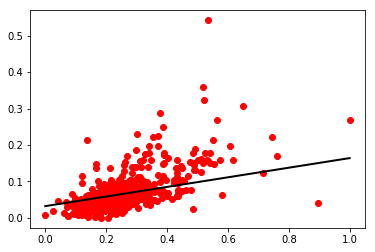

Epoch: 31 Generalization err: 0.0073153655178626355


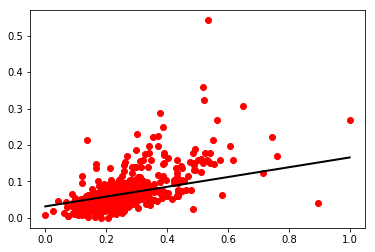

Epoch: 32 Generalization err: 0.007283097247587853


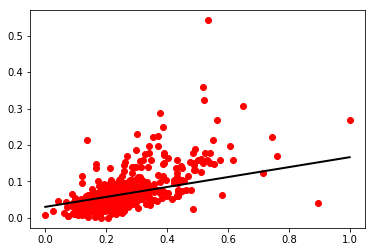

Epoch: 33 Generalization err: 0.0072682010523053234


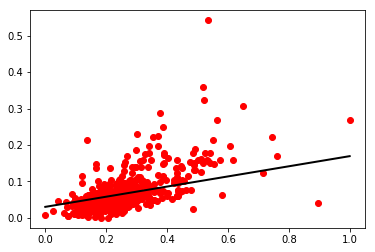

Epoch: 34 Generalization err: 0.007216998588610875


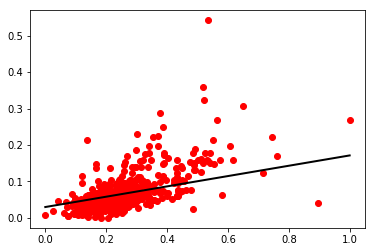

Epoch: 35 Generalization err: 0.007181637834685763


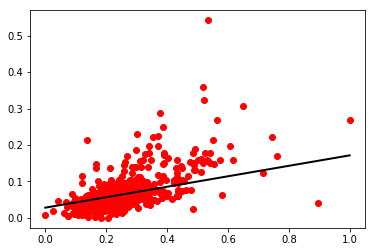

Epoch: 36 Generalization err: 0.0071766154436417725


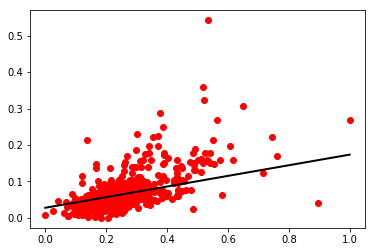

Epoch: 37 Generalization err: 0.0071404037336148815


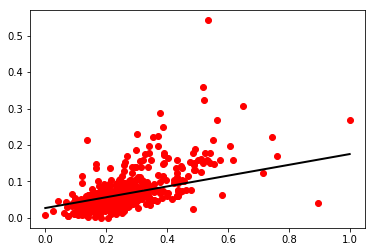

Epoch: 38 Generalization err: 0.00711324156282462


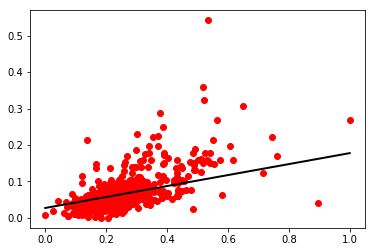

Epoch: 39 Generalization err: 0.007068849347108189


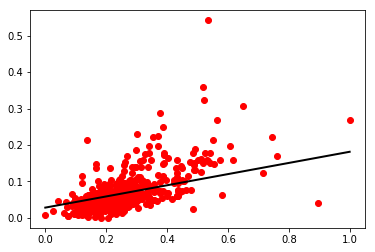

Epoch: 40 Generalization err: 0.007008445430140074


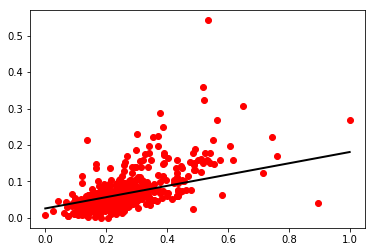

Epoch: 41 Generalization err: 0.007015068498644555


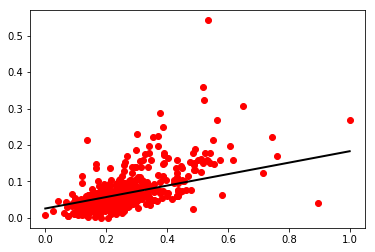

Epoch: 42 Generalization err: 0.006977477915371317


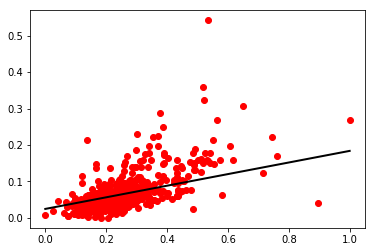

Epoch: 43 Generalization err: 0.006961360545198985


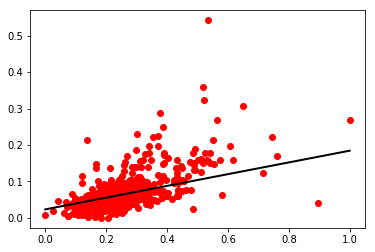

Epoch: 44 Generalization err: 0.006952367661314288


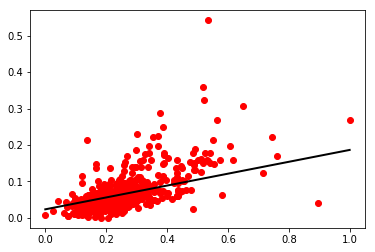

Epoch: 45 Generalization err: 0.006916474709991496


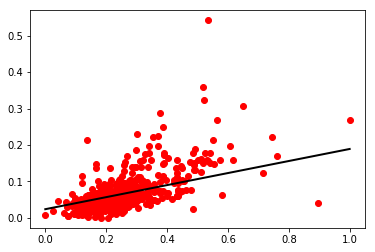

Epoch: 46 Generalization err: 0.006872821445604243


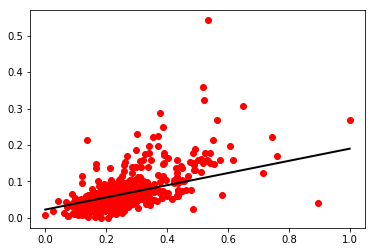

Epoch: 47 Generalization err: 0.006859145982000156


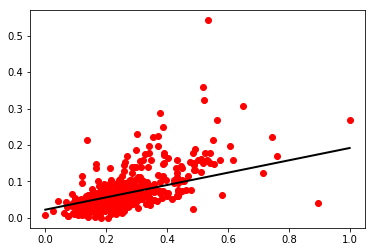

Epoch: 48 Generalization err: 0.006828462181920655


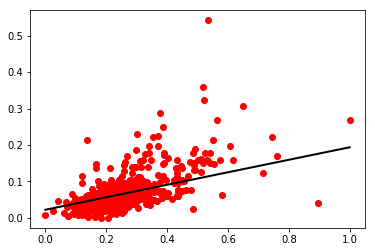

Epoch: 49 Generalization err: 0.006795971278407358


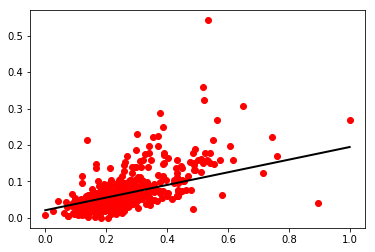

Epoch: 50 Generalization err: 0.006784110390453656


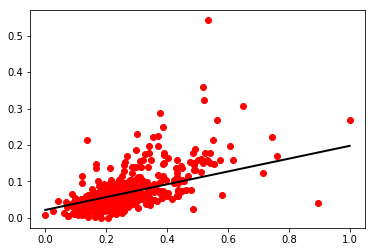

Epoch: 51 Generalization err: 0.006733017498530969


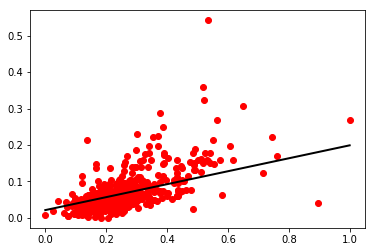

Epoch: 52 Generalization err: 0.006709839120712019


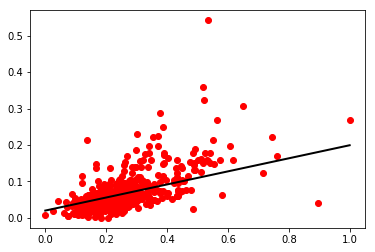

Epoch: 53 Generalization err: 0.006704827529009356


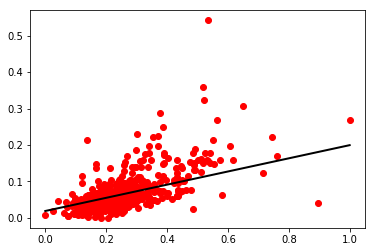

Epoch: 54 Generalization err: 0.006701963863708202


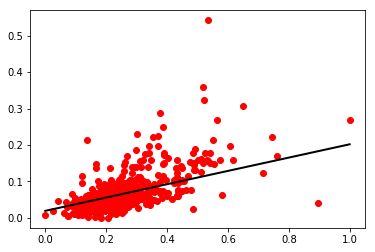

Epoch: 55 Generalization err: 0.006663347089530186


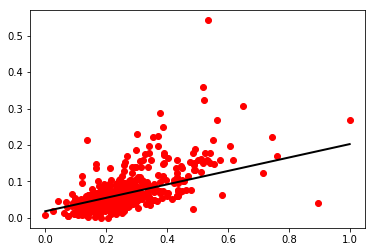

Epoch: 56 Generalization err: 0.006656434325435121


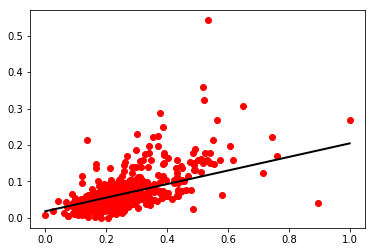

Epoch: 57 Generalization err: 0.0066239494286548725


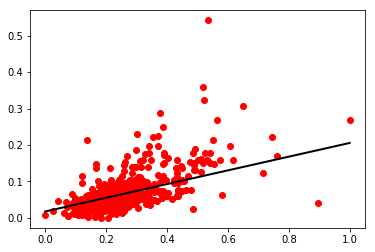

Epoch: 58 Generalization err: 0.006606574271680438


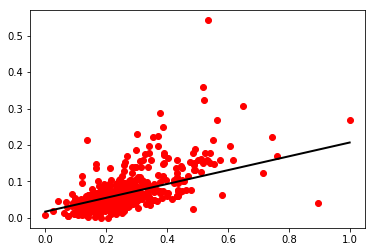

Epoch: 59 Generalization err: 0.006587748350796243


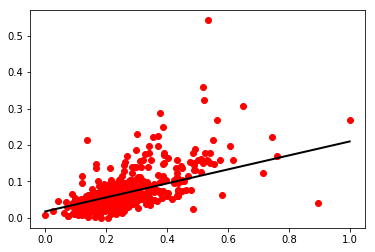

Epoch: 60 Generalization err: 0.0065422584300158


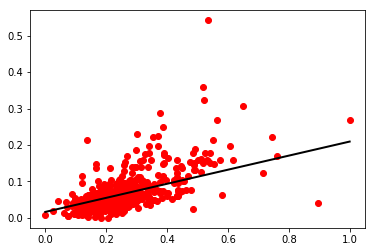

Epoch: 61 Generalization err: 0.006547361699982622


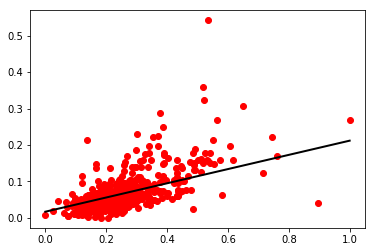

Epoch: 62 Generalization err: 0.006509019974386181


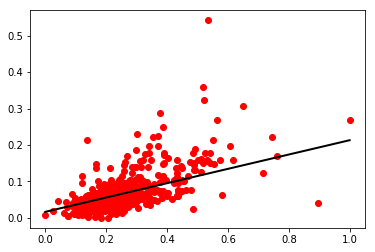

Epoch: 63 Generalization err: 0.006489844403563447


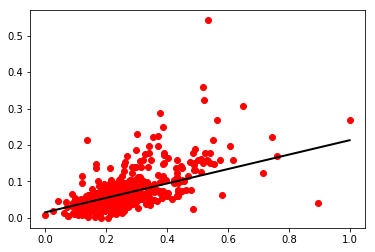

Epoch: 64 Generalization err: 0.0064908550059635545


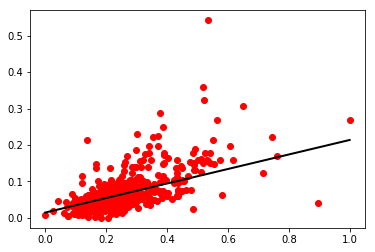

Epoch: 65 Generalization err: 0.006481283983926672


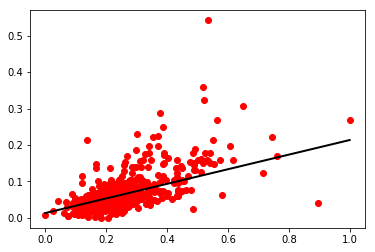

Epoch: 66 Generalization err: 0.00648793628689117


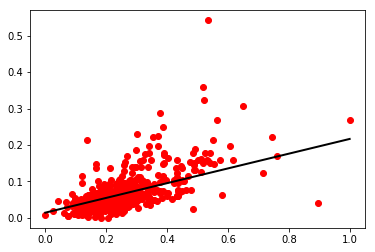

Epoch: 67 Generalization err: 0.006438585200940135


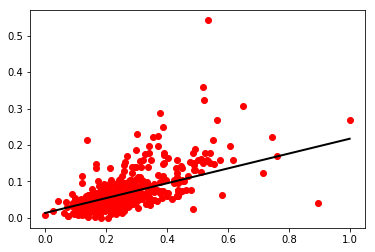

Epoch: 68 Generalization err: 0.006431424973879837


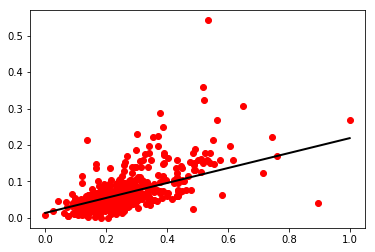

Epoch: 69 Generalization err: 0.006406774149150932


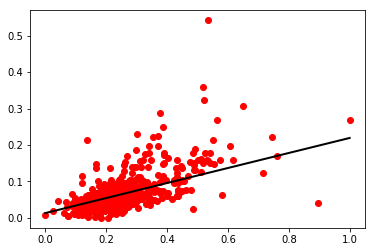

Epoch: 70 Generalization err: 0.006399462426290056


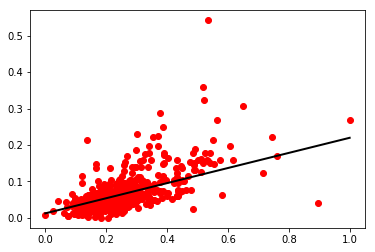

Epoch: 71 Generalization err: 0.006393943670326721


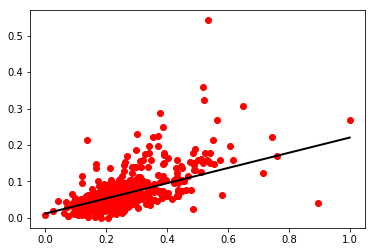

Epoch: 72 Generalization err: 0.006387480326496255


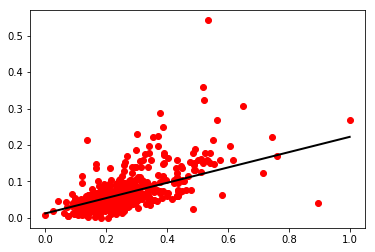

Epoch: 73 Generalization err: 0.006356312099245064


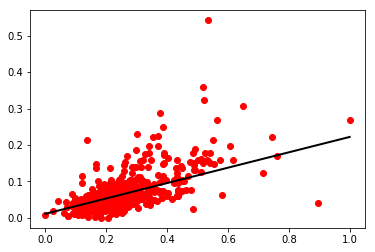

Epoch: 74 Generalization err: 0.006361825014896697


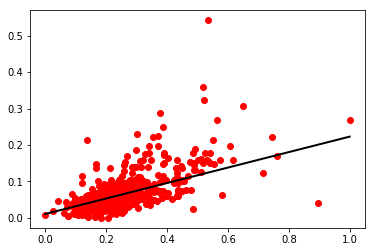

Epoch: 75 Generalization err: 0.006350268376123732


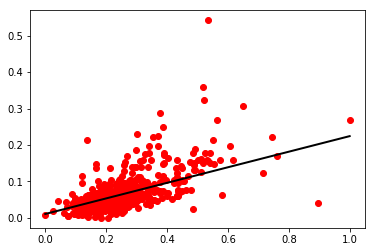

Epoch: 76 Generalization err: 0.006329151689596091


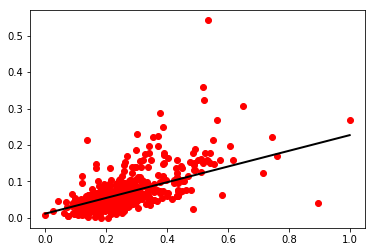

Epoch: 77 Generalization err: 0.006287719737484026


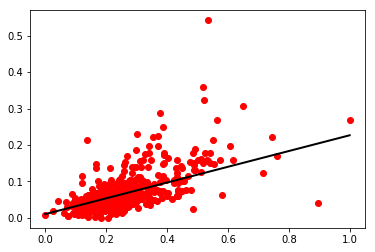

Epoch: 78 Generalization err: 0.006294925886623967


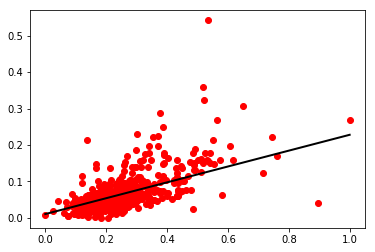

Epoch: 79 Generalization err: 0.006275159363033442


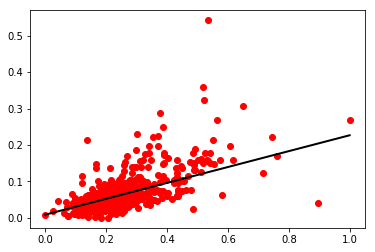

Epoch: 80 Generalization err: 0.006299324032770339


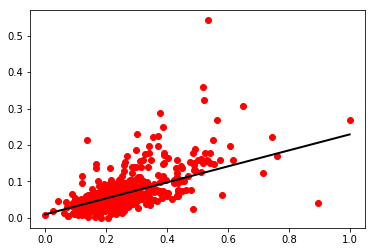

Epoch: 81 Generalization err: 0.006261441934862935


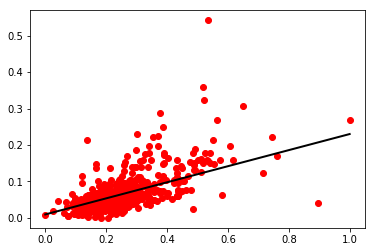

Epoch: 82 Generalization err: 0.0062474459267564545


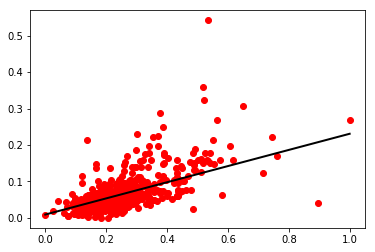

Epoch: 83 Generalization err: 0.006237065481871665


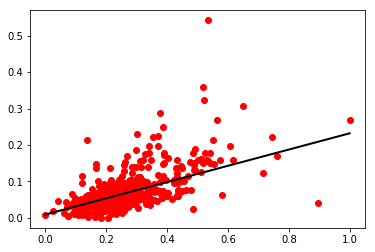

Epoch: 84 Generalization err: 0.006218981770835097


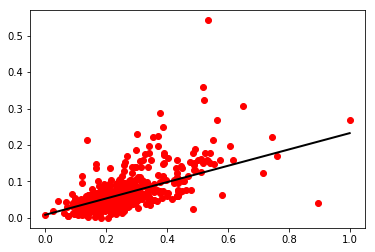

Epoch: 85 Generalization err: 0.006213828465469951


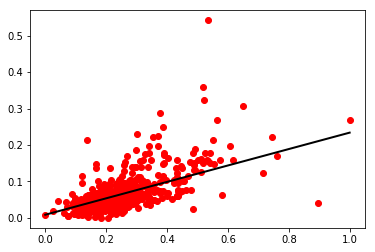

Epoch: 86 Generalization err: 0.0061934208503056035


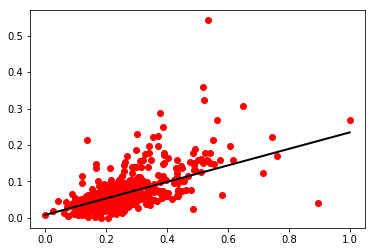

Epoch: 87 Generalization err: 0.006185471659864978


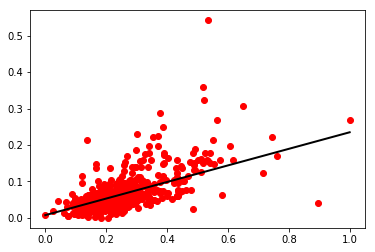

Epoch: 88 Generalization err: 0.006182033187019944


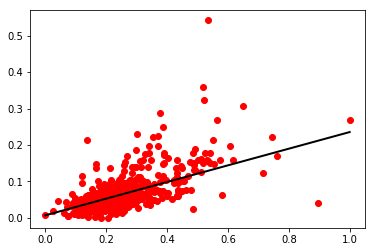

Epoch: 89 Generalization err: 0.006174939276109078


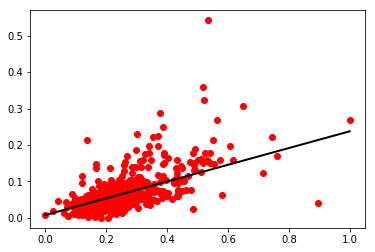

Epoch: 90 Generalization err: 0.00614446122089031


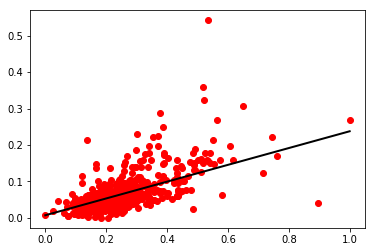

Epoch: 91 Generalization err: 0.006143346520219091


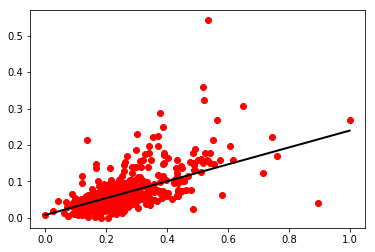

Epoch: 92 Generalization err: 0.006116685693585451


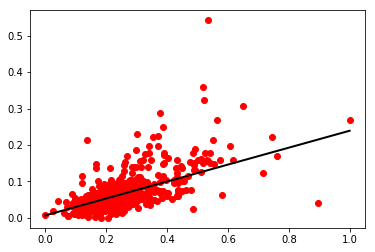

Epoch: 93 Generalization err: 0.006124070919359992


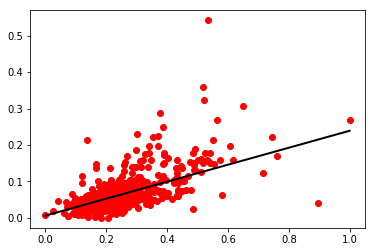

Epoch: 94 Generalization err: 0.00612713075078437


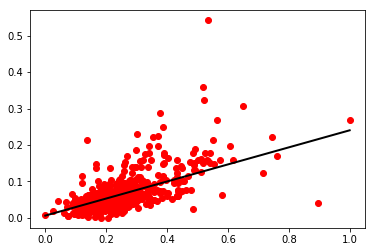

Epoch: 95 Generalization err: 0.006108848330734982


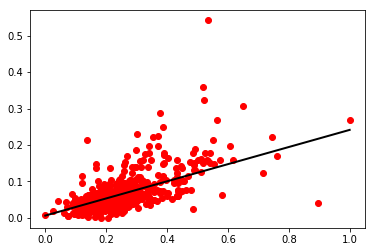

Epoch: 96 Generalization err: 0.00609260663405221


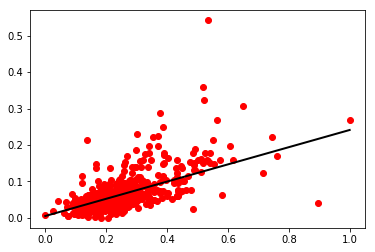

Epoch: 97 Generalization err: 0.006099886958746988


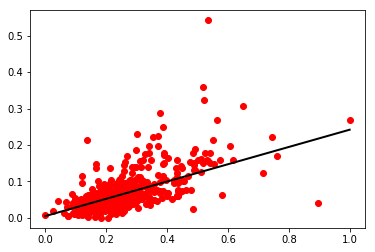

Epoch: 98 Generalization err: 0.0060895734657417724


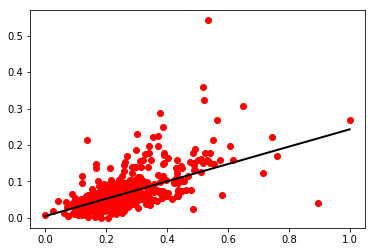

Epoch: 99 Generalization err: 0.006075685549279992


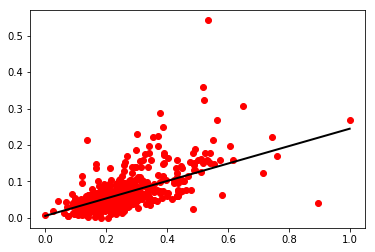

Epoch: 100 Generalization err: 0.006050765247716813


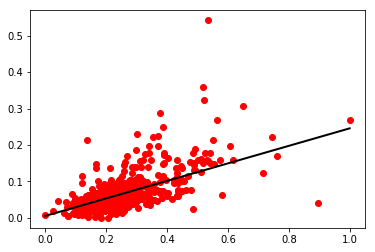

Epoch: 101 Generalization err: 0.006037272722027582


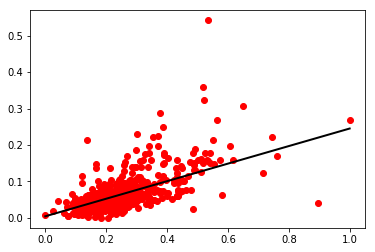

Epoch: 102 Generalization err: 0.006046633931499975


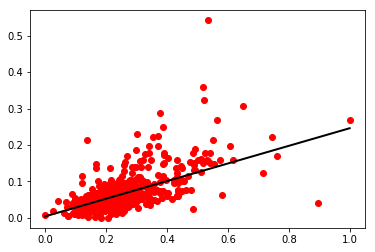

Epoch: 103 Generalization err: 0.006035676911969388


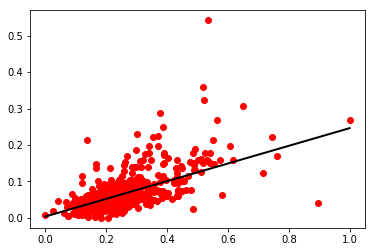

Epoch: 104 Generalization err: 0.006034297146439004


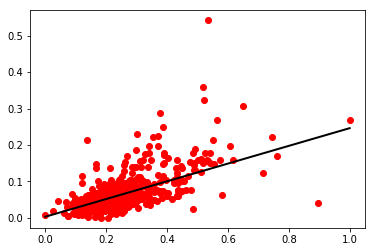

Epoch: 105 Generalization err: 0.006037517980936776


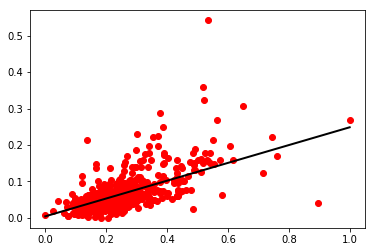

Epoch: 106 Generalization err: 0.006000973050508716


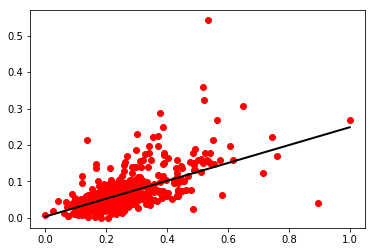

Epoch: 107 Generalization err: 0.006001857404392246


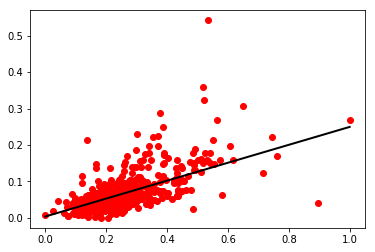

Epoch: 108 Generalization err: 0.005988154400873388


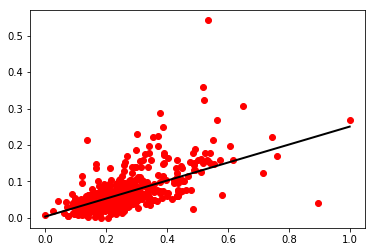

Epoch: 109 Generalization err: 0.005977608250689008


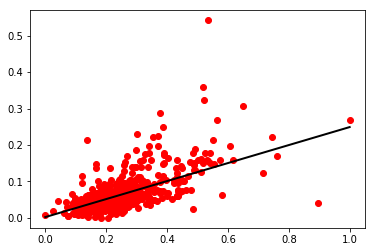

Epoch: 110 Generalization err: 0.006000048694871112


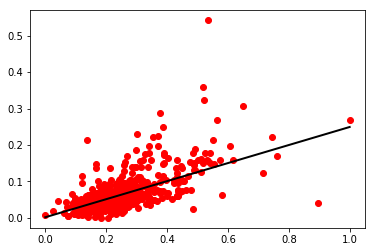

Epoch: 111 Generalization err: 0.005998878408988111


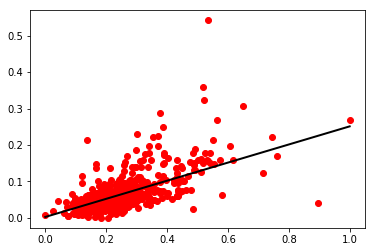

Epoch: 112 Generalization err: 0.005972115743813295


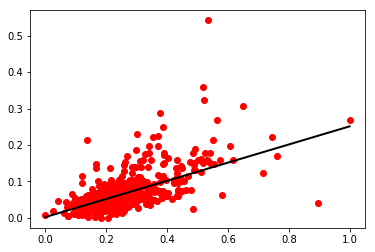

Epoch: 113 Generalization err: 0.005972247320402231


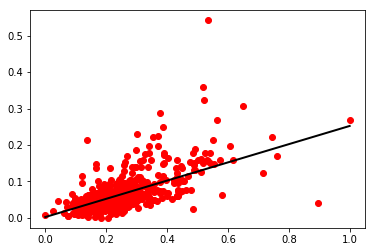

Epoch: 114 Generalization err: 0.005958005669272919


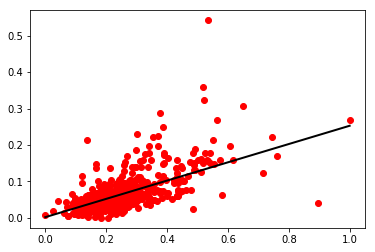

Epoch: 115 Generalization err: 0.005951672444735689


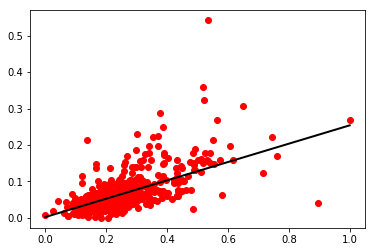

Epoch: 116 Generalization err: 0.005936495325375754


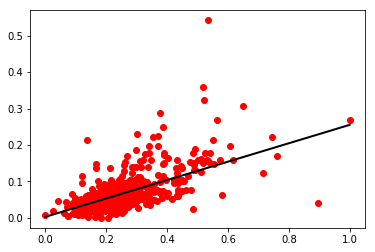

Epoch: 117 Generalization err: 0.005917925092507753


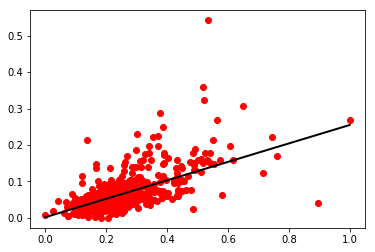

Epoch: 118 Generalization err: 0.005925049639460131


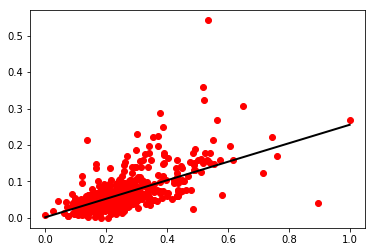

Epoch: 119 Generalization err: 0.005917500506392988


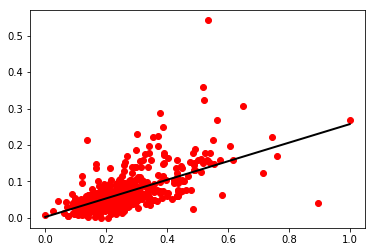

Epoch: 120 Generalization err: 0.005893508700699701


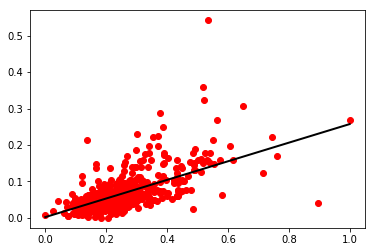

Epoch: 121 Generalization err: 0.005891788310156842


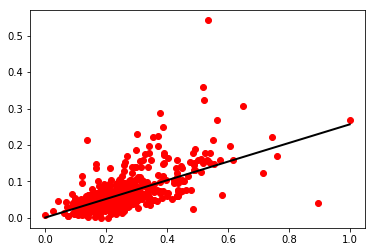

Epoch: 122 Generalization err: 0.005905812820579634


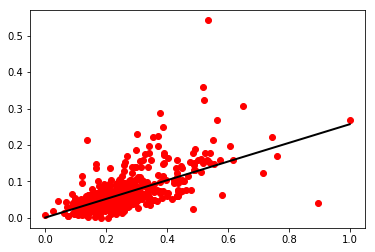

Epoch: 123 Generalization err: 0.005901316832003635


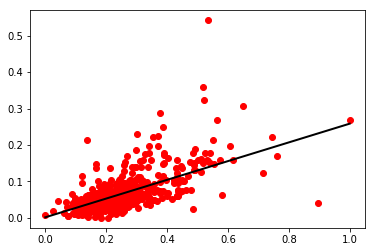

Epoch: 124 Generalization err: 0.005878735699284091


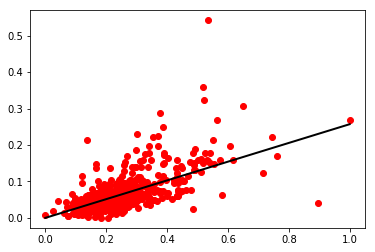

Epoch: 125 Generalization err: 0.005902806670202712


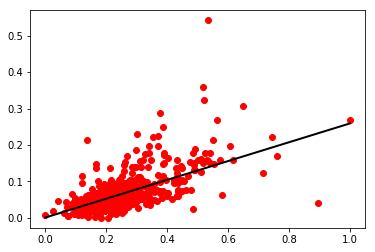

Epoch: 126 Generalization err: 0.005874491893668149


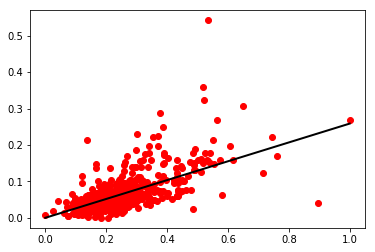

Epoch: 127 Generalization err: 0.005880439835449627


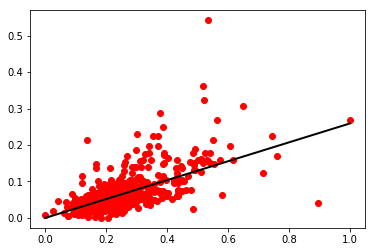

Epoch: 128 Generalization err: 0.005879886486167374


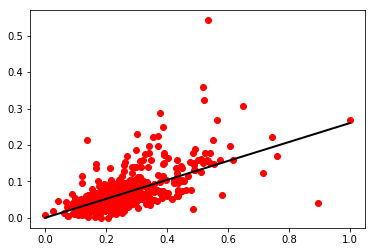

Epoch: 129 Generalization err: 0.005863695443050944


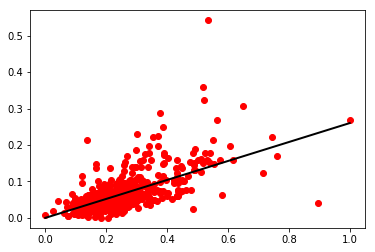

Epoch: 130 Generalization err: 0.005863257075431604


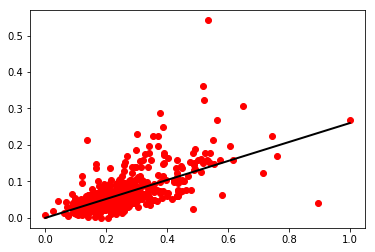

Epoch: 131 Generalization err: 0.005870984983077903


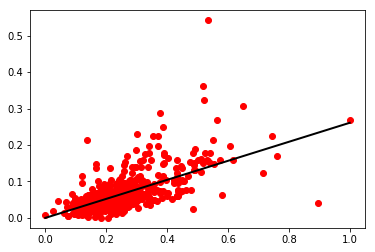

Epoch: 132 Generalization err: 0.005855853219356504


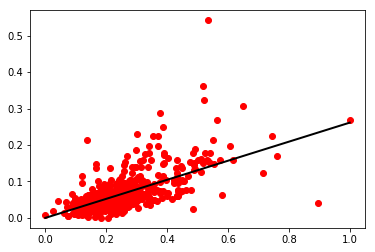

Epoch: 133 Generalization err: 0.005852927136110304


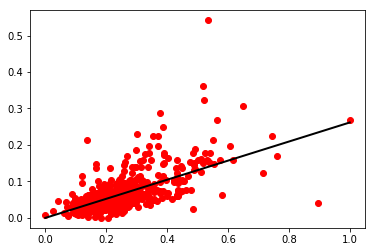

Epoch: 134 Generalization err: 0.005849357753863667


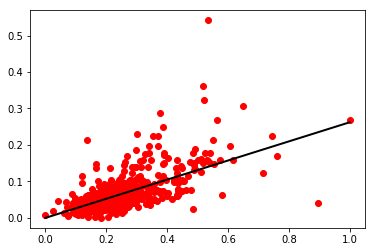

Epoch: 135 Generalization err: 0.005842304870460509


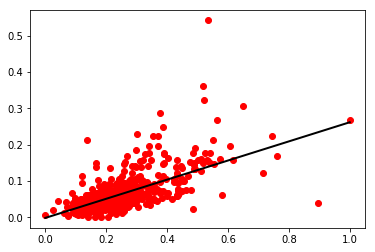

Epoch: 136 Generalization err: 0.005847537694818959


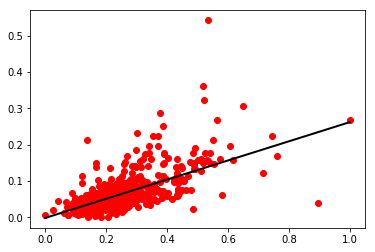

Epoch: 137 Generalization err: 0.005848250225078324


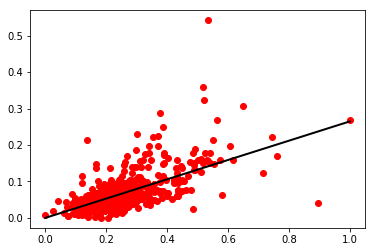

Epoch: 138 Generalization err: 0.0058067842875768215


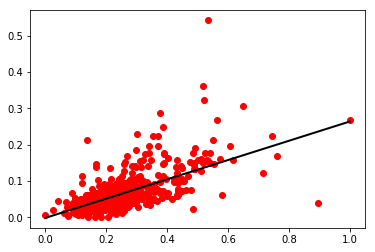

Epoch: 139 Generalization err: 0.0058213408736089755


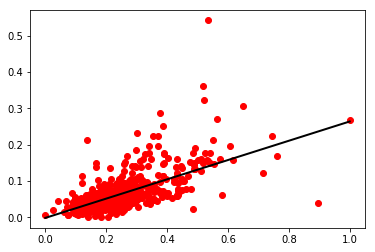

Epoch: 140 Generalization err: 0.005825690018560814


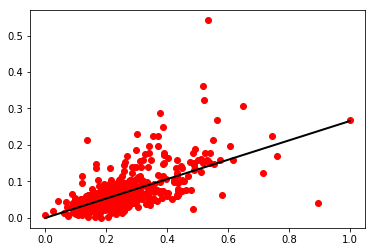

Epoch: 141 Generalization err: 0.005801916802510554


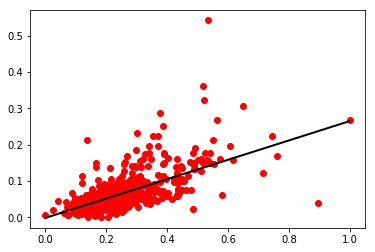

Epoch: 142 Generalization err: 0.005810375895795504


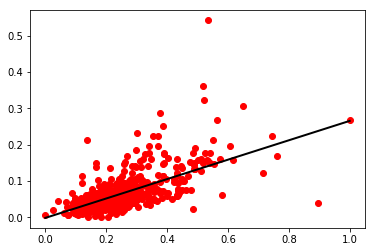

Epoch: 143 Generalization err: 0.005802296118151487


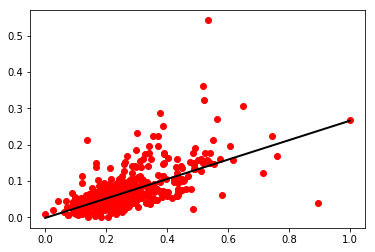

Epoch: 144 Generalization err: 0.005803202742448243


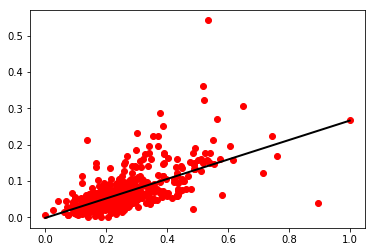

Epoch: 145 Generalization err: 0.0057972365160708205


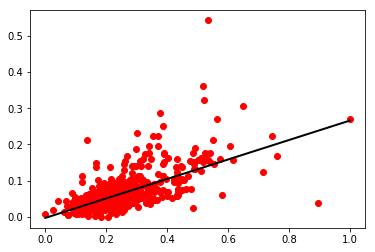

Epoch: 146 Generalization err: 0.005804241553947288


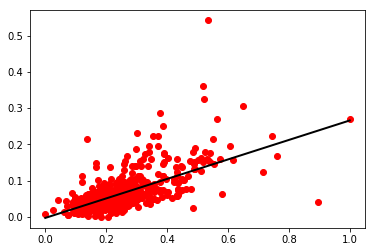

Epoch: 147 Generalization err: 0.0058028353948762325


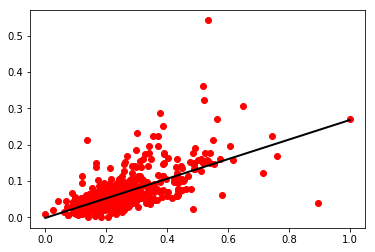

Epoch: 148 Generalization err: 0.005778164263239816


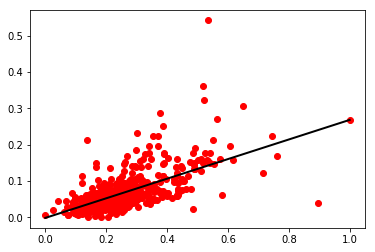

Epoch: 149 Generalization err: 0.005771060642424679


In [16]:
for epoch in range(total_epochs):
    erros = []
    for X_batch, y_batch in next_batch(Xs_train, Ys_train, batch_size=batch_size):

        # linearly combine input and weights
        train_pred = W0 + np.dot(X_batch, W1)
    
        # calculate the SSE between predicted and true values
        train_err = mean_squared_error(y_batch, train_pred)
        erros.append(train_err)
        
        # calculate the gradients with respect to W0 and W1
        DW0 = -(2/batch_size) * sum(y_batch.squeeze() - train_pred.squeeze())
        DW1 = -(2/batch_size) * sum(X_batch.squeeze() * (y_batch.squeeze() - train_pred.squeeze()))

        # update W0 and W1 in the opposite direction to the gradient
        W0 = W0 - lr * DW0
        W1 = W1 - lr * DW1
    
    eval_and_plot(W0, W1, min_x, max_x, epoch+1)
    training_err_list.append(np.mean(erros))
    
    # test in the end of epoch
    val_pred = W0 + np.dot(np.reshape(Xs_test, (-1,1)), W1)
    val_err = mean_squared_error(Ys_test, val_pred)
    print("Epoch:", epoch, "Generalization err:", val_err)
    validation_err_list.append(val_err)
    
    #epoch += 1
    if val_err < best_hypothesis:
        best_hypothesis = val_err
        W0_hat = W0
        W1_hat = W1

Text(0,0.5,'Error')

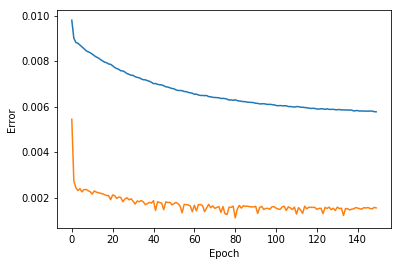

In [17]:
# plot the price and the size
plt.plot(validation_err_list, label="validation")
plt.plot(training_err_list, label="training")
plt.xlabel('Epoch')
plt.ylabel('Error')